# Part A
### Context : *In the realm of modern finance, businesses encounter the perpetual challenge of managing debt obligations effectively to maintain a favorable credit standing and foster sustainable growth. Investors keenly scrutinize companies capable of navigating financial complexities while ensuring stability and profitability. A pivotal instrument in this evaluation process is the balance sheet, which provides a comprehensive overview of a company's assets, liabilities, and shareholder equity, offering insights into its financial health and operational efficiency. In this context, leveraging available financial data, particularly from preceding fiscal periods, becomes imperative for informed decision-making and strategic planning.*

 

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the data
df1 = pd.read_csv(r"C:\Users\ahmed\Downloads\Comp_Fin_Data.csv")

In [4]:
df1.head()

Num  Networth Next Year  Total assets  Net worth  Total income  \
0    1               395.3         827.6      336.5         534.1   
1    2                36.2          67.7       24.3         137.9   
2    3                84.0         238.4       78.9         331.2   
3    4              2041.4        6883.5     1443.3        8448.5   
4    5                41.8          90.9       47.0         388.6   

   Change in stock  Total expenses  Profit after tax  PBDITA    PBT  ...  \
0             13.5           508.7              38.9   124.4   64.6  ...   
1             -3.7           131.0               3.2     5.5    1.0  ...   
2            -18.1           309.2               3.9    25.8   10.5  ...   
3            212.2          8482.4             178.3   418.4  185.1  ...   
4              3.4           392.7              -0.7     7.2   -0.6  ...   

   Debtors turnover  Finished goods turnover  WIP turnover  \
0              5.65                     3.99          3.37   
1               NaN                      NaN           NaN   
2              2.51                    17.67          8.76   
3              1.91                    18.14         18.62   
4             68.00                    45.87         28.67   

   Raw material turnover  Shares outstanding  Equity face value    EPS  \
0                  14.87           8760056.0               10.0   4.44   
1                    NaN                 NaN                NaN   0.00   
2                   8.35                 NaN                NaN   0.00   
3                  11.11          10000000.0               10.0  17.60   
4                  19.93            107315.0              100.0  -6.52   

   Adjusted EPS  Total liabilities  PE on BSE  
0          4.44              827.6        NaN  
1          0.00               67.7        NaN  
2          0.00              238.4        NaN  
3         17.60             6883.5        NaN  
4         -6.52               90.9        NaN  

[5 rows x 51 columns]

In [5]:
df1.columns = df1.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and')

In [6]:
df1.shape

(4256, 51)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

In [8]:
df1.describe()

Num  Networth_Next_Year  Total_assets      Net_worth  \
count  4256.000000         4256.000000  4.256000e+03    4256.000000   
mean   2128.500000         1344.740883  3.573617e+03    1351.949601   
std    1228.745702        15936.743168  3.007444e+04   12961.311651   
min       1.000000       -74265.600000  1.000000e-01       0.000000   
25%    1064.750000            3.975000  9.130000e+01      31.475000   
50%    2128.500000           72.100000  3.155000e+02     104.800000   
75%    3192.250000          330.825000  1.120800e+03     389.850000   
max    4256.000000       805773.400000  1.176509e+06  613151.600000   

       Total_income  Change_in_stock  Total_expenses  Profit_after_tax  \
count  4.025000e+03      3706.000000    4.091000e+03       4102.000000   
mean   4.688190e+03        43.702482    4.356301e+03        295.050585   
std    5.391895e+04       436.915048    5.139809e+04       3079.902071   
min    0.000000e+00     -3029.400000   -1.000000e-01      -3908.300000   
25%    1.071000e+02        -1.800000    9.680000e+01          0.500000   
50%    4.551000e+02         1.600000    4.268000e+02          9.000000   
75%    1.485000e+03        18.400000    1.395700e+03         53.300000   
max    2.442828e+06     14185.500000    2.366035e+06     119439.100000   

              PBDITA            PBT  ...  Debtors_turnover  \
count    4102.000000    4102.000000  ...       3871.000000   
mean      605.940639     410.259044  ...         17.929029   
std      5646.230633    4217.415307  ...         90.164435   
min      -440.700000   -3894.800000  ...          0.000000   
25%         6.925000       0.800000  ...          3.810000   
50%        36.900000      12.600000  ...          6.470000   
75%       158.700000      74.175000  ...         11.850000   
max    208576.500000  145292.600000  ...       3135.200000   

       Finished_goods_turnover  WIP_turnover  Raw_material_turnover  \
count              3382.000000   3492.000000            3828.000000   
mean                 84.369988     28.684513              17.733926   
std                 562.637359    169.650915             343.125864   
min                  -0.090000     -0.180000              -2.000000   
25%                   8.190000      5.100000               3.020000   
50%                  17.320000      9.860000               6.410000   
75%                  40.012500     20.240000              11.822500   
max               17947.600000   5651.400000           21092.000000   

       Shares_outstanding  Equity_face_value            EPS   Adjusted_EPS  \
count        3.446000e+03        3446.000000    4256.000000    4256.000000   
mean         2.376491e+07       -1094.828671    -196.217467    -197.527608   
std          1.709790e+08       34101.358644   13061.953425   13061.929512   
min         -2.147484e+09     -999998.900000 -843181.820000 -843181.820000   
25%          1.308382e+06          10.000000       0.000000       0.000000   
50%          4.750000e+06          10.000000       1.490000       1.240000   
75%          1.090602e+07          10.000000      10.000000       7.615000   
max          4.130401e+09      100000.000000   34522.530000   34522.530000   

       Total_liabilities     PE_on_BSE  
count       4.256000e+03   1629.000000  
mean        3.573617e+03     55.462290  
std         3.007444e+04   1304.445296  
min         1.000000e-01  -1116.640000  
25%         9.130000e+01      2.970000  
50%         3.155000e+02      8.690000  
75%         1.120800e+03     17.000000  
max         1.176509e+06  51002.740000  

[8 rows x 51 columns]

In [9]:
df1.isnull().sum()

Num                                                  0
Networth_Next_Year                                   0
Total_assets                                         0
Net_worth                                            0
Total_income                                       231
Change_in_stock                                    550
Total_expenses                                     165
Profit_after_tax                                   154
PBDITA                                             154
PBT                                                154
Cash_profit                                        154
PBDITA_as_perc_of_total_income                      79
PBT_as_perc_of_total_income                         79
PAT_as_perc_of_total_income                         79
Cash_profit_as_perc_of_total_income                 79
PAT_as_perc_of_net_worth                             0
Sales                                              305
Income_from_fincial_services                      1111
Other_inco

#### Calculate percentage of missing values for each column

In [11]:
missing_percentage = (df1.isnull().sum() / len(df1)) * 100
missing_percentage.sort_values(ascending=False)

PE_on_BSE                                         61.724624
Investments                                       40.296053
Other_income                                      36.560150
Contingent_liabilities                            32.941729
Deferred_tax_liability                            32.166353
Income_from_fincial_services                      26.104323
Finished_goods_turnover                           20.535714
Equity_face_value                                 19.031955
Shares_outstanding                                19.031955
WIP_turnover                                      17.951128
Change_in_stock                                   12.922932
Borrowings                                        10.126880
Raw_material_turnover                             10.056391
Creditors_turnover                                 9.187030
Debtors_turnover                                   9.046053
Sales                                              7.166353
Total_income                            

In [12]:
#### Drop columns with >30% missing values

df1 = df1.dropna(thresh=len(df1) * 0.3, axis=1)

#### Impute missing values with median for numerical columns

In [14]:
df1 = df1.fillna(df1.median())

#### Dropping column "Num" as it is not relevant

In [16]:
df1 = df1.drop(columns=['Num'])

# Exploratory Data Analysis (EDA)

### Histograms & Boxplots for numerical variables

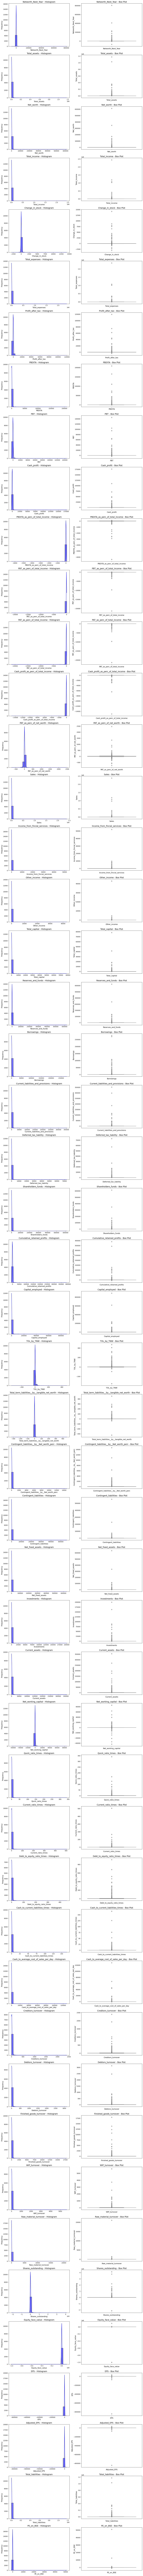

In [18]:
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns
num_cols = 2  # Number of columns (1 for histogram, 1 for box plot)
num_rows = len(numeric_columns)  # Number of rows for the subplots

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 5 * num_rows))
axes = axes.flatten() 

# Iterate over numeric columns to plot histograms and box plots
for i, col in enumerate(numeric_columns):
    # Plot Histogram
    sns.histplot(df1[col], kde=True, bins=30, ax=axes[2*i], edgecolor='black', color='blue')
    axes[2*i].set_title(f"{col} - Histogram", fontsize=14)
    axes[2*i].set_xlabel(col, fontsize=12)
    axes[2*i].set_ylabel('Frequency', fontsize=12)
    axes[2*i].grid(False)

    # Plot Box plot
    sns.boxplot(y=df1[col], ax=axes[2*i+1], color='lightblue')
    axes[2*i+1].set_title(f"{col} - Box Plot", fontsize=14)
    axes[2*i+1].set_xlabel(col, fontsize=12)
    axes[2*i+1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
    axes[2*i+1].tick_params(axis='y', labelsize=10)  # Adjust y-axis label font size
    axes[2*i+1].set_ylabel(col, fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()


### Correlation matrix

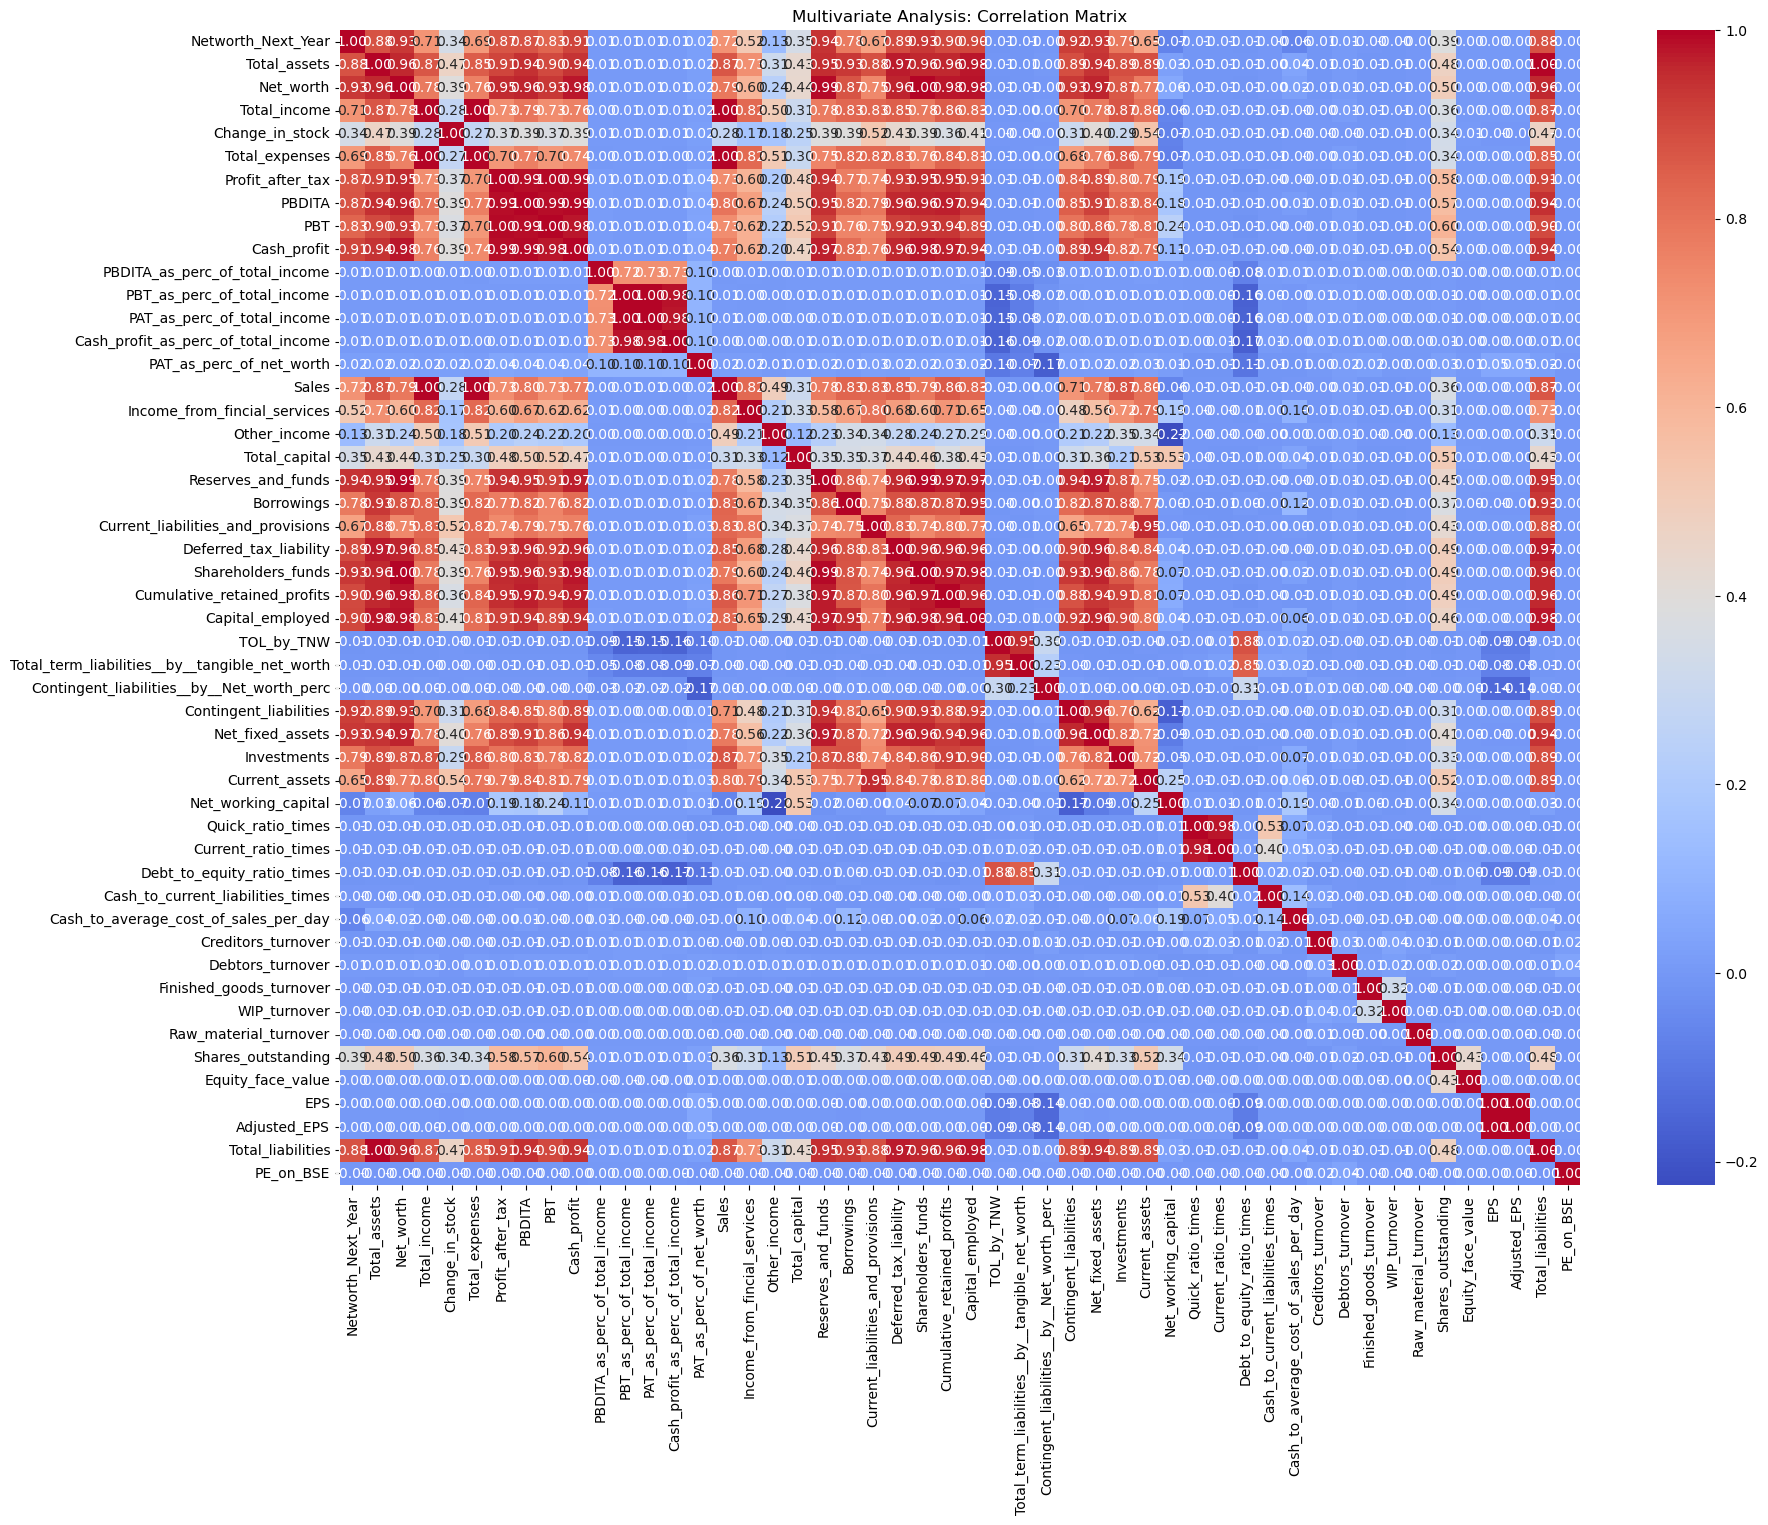

In [20]:
plt.figure(figsize=(20, 15))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Multivariate Analysis: Correlation Matrix")
plt.show()


In [21]:
df1.corr()

Networth_Next_Year  \
Networth_Next_Year                                        1.000000   
Total_assets                                              0.877803   
Net_worth                                                 0.930135   
Total_income                                              0.710987   
Change_in_stock                                           0.344774   
Total_expenses                                            0.690573   
Profit_after_tax                                          0.867992   
PBDITA                                                    0.872391   
PBT                                                       0.833807   
Cash_profit                                               0.906598   
PBDITA_as_perc_of_total_income                            0.007119   
PBT_as_perc_of_total_income                               0.006313   
PAT_as_perc_of_total_income                               0.005891   
Cash_profit_as_perc_of_total_income                       0.006261   
PAT_as_perc_of_net_worth                                  0.021671   
Sales                                                     0.716326   
Income_from_fincial_services                              0.521188   
Other_income                                              0.132767   
Total_capital                                             0.349076   
Reserves_and_funds                                        0.938539   
Borrowings                                                0.782701   
Current_liabilities_and_provisions                        0.667033   
Deferred_tax_liability                                    0.890612   
Shareholders_funds                                        0.929903   
Cumulative_retained_profits                               0.897528   
Capital_employed                                          0.901214   
TOL_by_TNW                                               -0.010461   
Total_term_liabilities__by__tangible_net_worth           -0.006422   
Contingent_liabilities__by__Net_worth_perc               -0.001563   
Contingent_liabilities                                    0.918862   
Net_fixed_assets                                          0.929521   
Investments                                               0.787572   
Current_assets                                            0.654637   
Net_working_capital                                      -0.065844   
Quick_ratio_times                                        -0.005882   
Current_ratio_times                                      -0.005748   
Debt_to_equity_ratio_times                               -0.011834   
Cash_to_current_liabilities_times                        -0.002299   
Cash_to_average_cost_of_sales_per_day                    -0.058730   
Creditors_turnover                                       -0.006477   
Debtors_turnover                                          0.006270   
Finished_goods_turnover                                  -0.004042   
WIP_turnover                                             -0.004790   
Raw_material_turnover                                    -0.001573   
Shares_outstanding                                        0.386855   
Equity_face_value                                         0.003594   
EPS                                                       0.003431   
Adjusted_EPS                                              0.003344   
Total_liabilities                                         0.877803   
PE_on_BSE                                                -0.001162   

                                                Total_assets  Net_worth  \
Networth_Next_Year                                  0.877803   0.930135   
Total_assets                                        1.000000   0.959404   
Net_worth                                           0.959404   1.000000   
Total_income                                        0.868250   0.783816   
Change_in_stock                                     0.467289   0.393646   
Total_expenses             

### Pairplot for selected variables

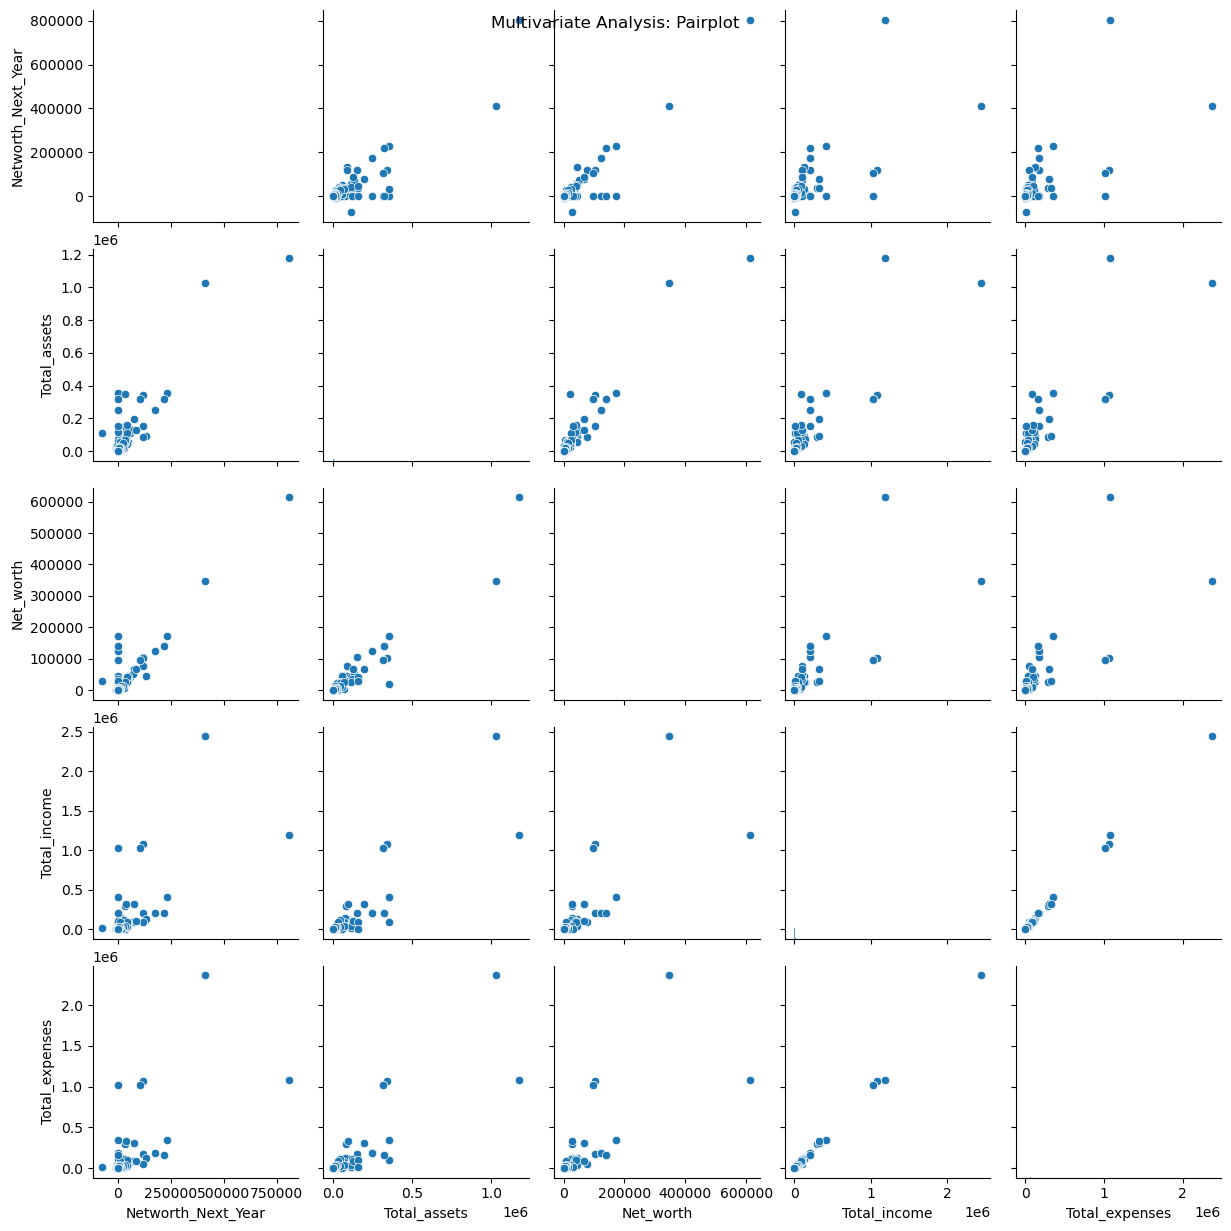

In [23]:
sns.pairplot(df1[['Networth_Next_Year', 'Total_assets', 'Net_worth', 'Total_income', 'Total_expenses']])
plt.suptitle("Multivariate Analysis: Pairplot")
plt.show()

In [24]:
# Key Observations
print("Key Observations:")
print("- The dataset contains 4256 rows and 51 columns.")
print("- Some columns have missing values, which will be handled during preprocessing.")
print("- The target variable 'Networth_Next_Year' will be used to classify companies as defaulters (1) or non-defaulters (0).")
print("- High correlations are observed between some features, indicating potential multicollinearity.")

Key Observations:
- The dataset contains 4256 rows and 51 columns.
- Some columns have missing values, which will be handled during preprocessing.
- The target variable 'Networth_Next_Year' will be used to classify companies as defaulters (1) or non-defaulters (0).
- High correlations are observed between some features, indicating potential multicollinearity.


### Outlier Detection & Treatment

In [26]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1 = df1.clip(lower=lower_bound, upper=upper_bound, axis=1)  # Cap outliers
print("Shape after capping outliers:", df1.shape)

Shape after capping outliers: (4256, 50)


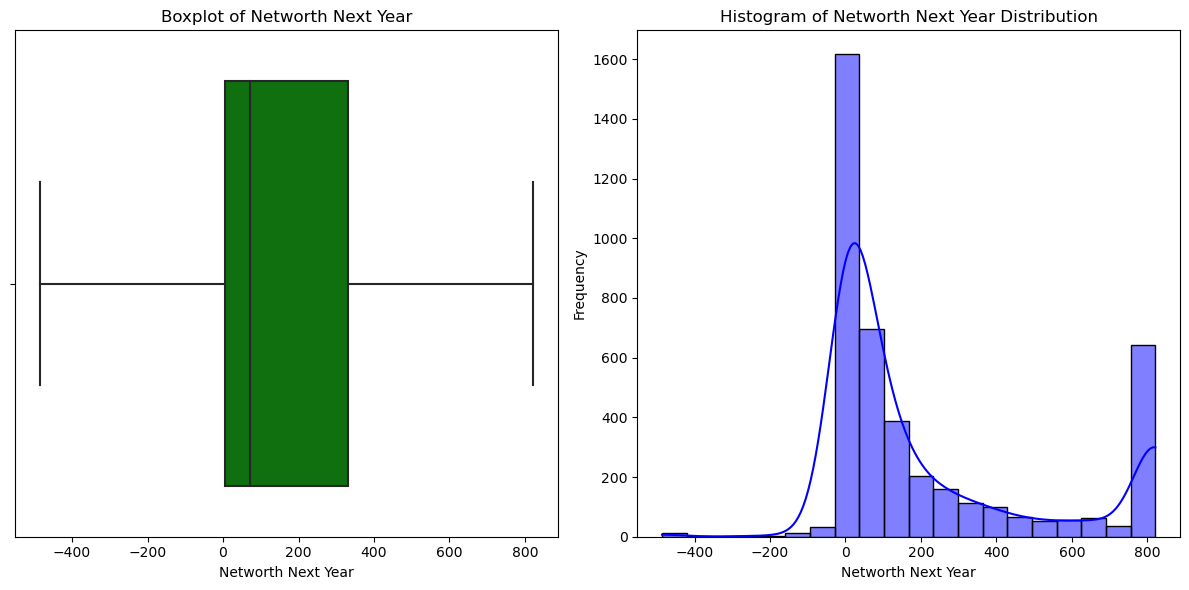

In [27]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for Networth_Next_Year
sns.boxplot(data=df1, x='Networth_Next_Year', color='green', ax=display[0])
display[0].set_title('Boxplot of Networth Next Year')
display[0].set_xlabel('Networth Next Year')

# Histogram for Networth_Next_Year
sns.histplot(df1['Networth_Next_Year'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Histogram of Networth Next Year Distribution')
display[1].set_xlabel('Networth Next Year')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


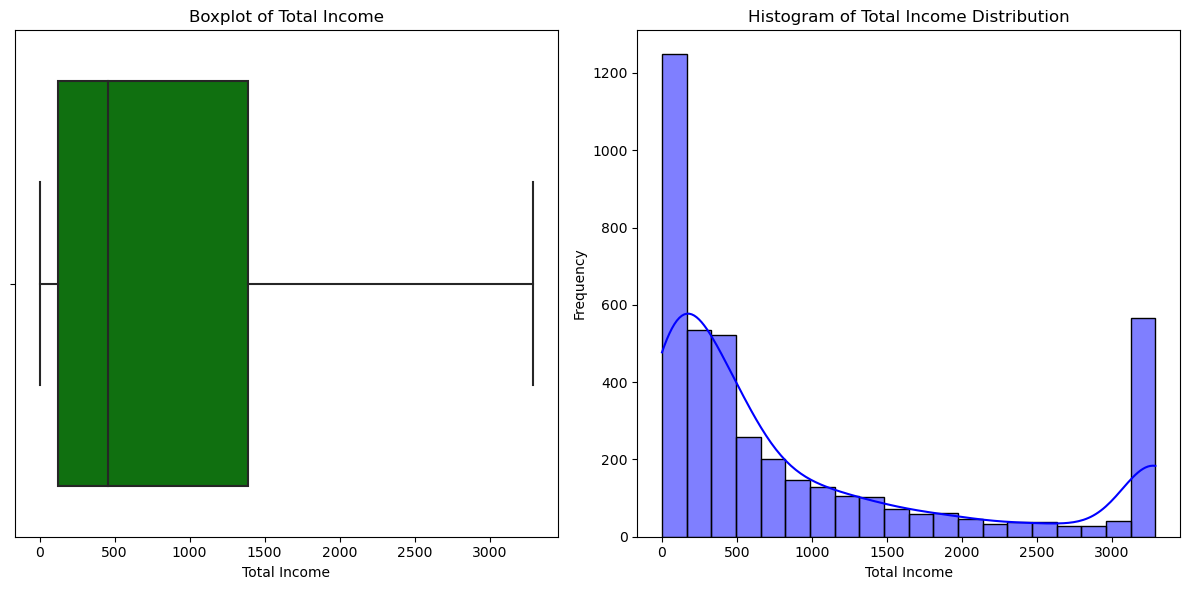

In [28]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for Total_income
sns.boxplot(data=df1, x='Total_income', color='green', ax=display[0])
display[0].set_title('Boxplot of Total Income')
display[0].set_xlabel('Total Income')

# Histogram for Total_income
sns.histplot(df1['Total_income'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Histogram of Total Income Distribution')
display[1].set_xlabel('Total Income')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


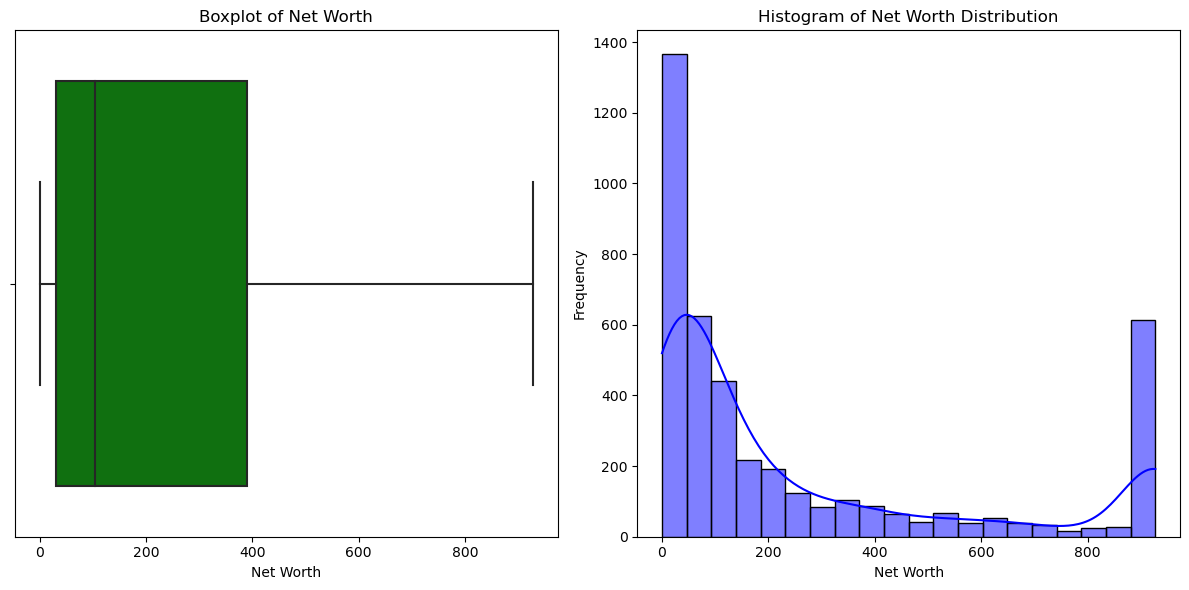

In [29]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for Net_worth
sns.boxplot(data=df1, x='Net_worth', color='green', ax=display[0])
display[0].set_title('Boxplot of Net Worth')
display[0].set_xlabel('Net Worth')

# Histogram for Net_worth
sns.histplot(df1['Net_worth'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Histogram of Net Worth Distribution')
display[1].set_xlabel('Net Worth')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Encode Categorical Variables

In [31]:
encoder = LabelEncoder()
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = encoder.fit_transform(df1[col])

### Target Variable Creation

In [33]:
df1['default'] = np.where(df1['Networth_Next_Year'] < 0, 1, 0)
X = df1.drop(columns=['Networth_Next_Year', 'default',]) 
y = df1['default']

In [34]:
print(df1['default'].value_counts(normalize=True) * 100)

default
0    94.50188
1     5.49812
Name: proportion, dtype: float64


#### The dataset is highly imbalanced, with class 1 (default) representing only 5.5% of the data. This imbalance can lead to:

#### *Bias in model predictions towards the majority class (non-default).*
#### *Poor recall for class 1, meaning the model fails to identify actual defaulters.*
#### To address this, we implement the following strategies:
* Class Weights: Assign higher weights to the minority class in Logistic Regression and Random Forest.
* SMOTE (Synthetic Minority Over-sampling Technique): If class weights do not sufficiently improve recall, we use SMOTE to generate synthetic samples for the minority class.

### Data Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Scale the Data

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Apply SMOTE for class balance

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Model Building
#### Metrics of Choice (Justify the evaluation metrics)
#### For imbalanced datasets, accuracy can be misleading. We prioritize:
#### - Recall: To identify as many defaulters as possible.
#### - F1-Score: To balance precision and recall.
#### - ROC-AUC: To evaluate the model's ability to distinguish between classes.

### Logistic Regression

In [44]:
log_reg = LogisticRegression(class_weight='balanced')  # Handle class imbalance
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

### Random Forest

In [46]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')  # Handle class imbalance
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### Model Evaluation

In [48]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("\n")

In [49]:
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Logistic Regression Metrics:
Accuracy: 0.852112676056338
Precision: 0.24516129032258063
Recall: 0.8085106382978723
F1-Score: 0.37623762376237624
ROC-AUC: 0.8315845116955201


Random Forest Metrics:
Accuracy: 0.9354460093896714
Precision: 0.38235294117647056
Recall: 0.2765957446808511
F1-Score: 0.32098765432098764
ROC-AUC: 0.6252543940795561




### Model Performance Improvement

#### Dealing with Multicollinearity using VIF

In [51]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF Analysis:\n", vif_data)

VIF Analysis:
                                            Feature         VIF
0                                     Total_assets         inf
1                                        Net_worth  109.132277
2                                     Total_income  210.634545
3                                  Change_in_stock    1.293400
4                                   Total_expenses  174.483480
5                                 Profit_after_tax   56.457759
6                                           PBDITA   29.550452
7                                              PBT   58.782729
8                                      Cash_profit   22.741301
9                   PBDITA_as_perc_of_total_income    6.211306
10                     PBT_as_perc_of_total_income   27.527284
11                     PAT_as_perc_of_total_income   26.152077
12             Cash_profit_as_perc_of_total_income    7.741233
13                        PAT_as_perc_of_net_worth    2.915009
14                                      

#### Remove features with high VIF (VIF > 10)

In [53]:
high_vif_features = vif_data[vif_data['VIF'] > 10]['Feature']
X = X.drop(columns=high_vif_features)

#### Recalculate VIF after removing high VIF features

In [55]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF Analysis after removing high VIF features:\n", vif_data)

VIF Analysis after removing high VIF features:
                                            Feature       VIF
0                                  Change_in_stock  1.198167
1                   PBDITA_as_perc_of_total_income  4.621999
2              Cash_profit_as_perc_of_total_income  5.119409
3                         PAT_as_perc_of_net_worth  2.019094
4                     Income_from_fincial_services  2.468155
5                                     Other_income  1.602306
6                                    Total_capital  4.243436
7                                       Borrowings  3.226804
8                           Deferred_tax_liability  2.412336
9                      Cumulative_retained_profits  3.282369
10                                      TOL_by_TNW  4.587692
11  Total_term_liabilities__by__tangible_net_worth  4.780743
12      Contingent_liabilities__by__Net_worth_perc  1.903540
13                          Contingent_liabilities  3.242435
14                                   

#### Update training and testing data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scale the Data

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Rebuild Logistic Regression

In [61]:
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression (After VIF Removal)")

Logistic Regression (After VIF Removal) Metrics:
Accuracy: 0.8708920187793427
Precision: 0.2980132450331126
Recall: 0.9183673469387755
F1-Score: 0.45
ROC-AUC: 0.8931811828093629




#### Rebuild Random Forest

In [63]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest (After VIF Removal)")

Random Forest (After VIF Removal) Metrics:
Accuracy: 0.937793427230047
Precision: 0.375
Recall: 0.12244897959183673
F1-Score: 0.18461538461538463
ROC-AUC: 0.5549978397336518




#### Identify Optimal Threshold for Logistic Regression using ROC Curve

In [65]:
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_log_reg)

### Plot ROC Curve

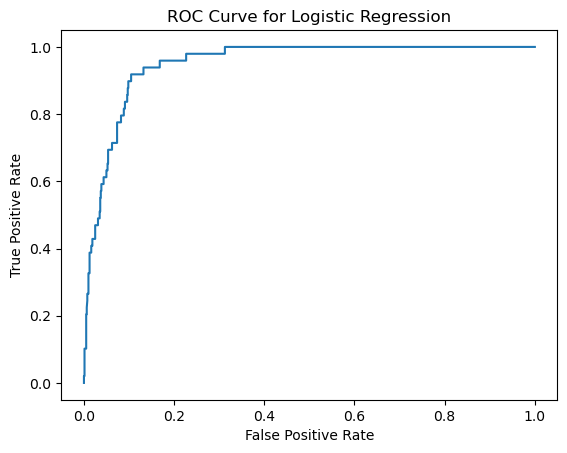

In [67]:
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.show()

### Find Optimal Threshold

In [69]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.5461761727981601


### Apply Optimal Threshold

In [71]:
y_pred_log_reg_optimal = (y_pred_prob_log_reg >= optimal_threshold).astype(int)
evaluate_model(y_test, y_pred_log_reg_optimal, "Logistic Regression (Optimal Threshold)")

Logistic Regression (Optimal Threshold) Metrics:
Accuracy: 0.8967136150234741
Precision: 0.3488372093023256
Recall: 0.9183673469387755
F1-Score: 0.5056179775280899
ROC-AUC: 0.9068798129463491




### Hyperparameter Tuning for Random Forest

In [73]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]}

In [74]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_search.best_params_)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


### Evaluate Tuned Random Forest

In [76]:
y_pred_rf_tuned = grid_search.predict(X_test)
evaluate_model(y_test, y_pred_rf_tuned, "Tuned Random Forest")

Tuned Random Forest Metrics:
Accuracy: 0.9565727699530516
Precision: 0.6666666666666666
Recall: 0.4897959183673469
F1-Score: 0.5647058823529412
ROC-AUC: 0.7374259791089538




### Model Performance Comparison and Final Model Selection
#### Compare All Models

In [78]:
print("Final Model Comparison:")
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_log_reg_optimal, "Logistic Regression (Optimal Threshold)")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_rf_tuned, "Tuned Random Forest")

Final Model Comparison:
Logistic Regression Metrics:
Accuracy: 0.8708920187793427
Precision: 0.2980132450331126
Recall: 0.9183673469387755
F1-Score: 0.45
ROC-AUC: 0.8931811828093629


Logistic Regression (Optimal Threshold) Metrics:
Accuracy: 0.8967136150234741
Precision: 0.3488372093023256
Recall: 0.9183673469387755
F1-Score: 0.5056179775280899
ROC-AUC: 0.9068798129463491


Random Forest Metrics:
Accuracy: 0.937793427230047
Precision: 0.375
Recall: 0.12244897959183673
F1-Score: 0.18461538461538463
ROC-AUC: 0.5549978397336518


Tuned Random Forest Metrics:
Accuracy: 0.9565727699530516
Precision: 0.6666666666666666
Recall: 0.4897959183673469
F1-Score: 0.5647058823529412
ROC-AUC: 0.7374259791089538




### Select Final Model based on highest recall

In [80]:
# Select Final Model based on highest recall
final_model = y_pred_log_reg_optimal  # Logistic Regression (Optimal Threshold)

In [81]:

# Compare models based on Recall
def evaluate_model_recall(y_test, y_pred, model_name):
    print(f"{model_name} Metrics:")
    print("Recall:", recall_score(y_test, y_pred))
    print("\n")

print("Final Model Comparison based on Recall:")
evaluate_model_recall(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model_recall(y_test, y_pred_log_reg_optimal, "Logistic Regression (Optimal Threshold)")
evaluate_model_recall(y_test, y_pred_rf, "Random Forest")
evaluate_model_recall(y_test, y_pred_rf_tuned, "Tuned Random Forest")

# Based on recall, select the model with the highest recall
if recall_score(y_test, y_pred_rf_tuned) > recall_score(y_test, y_pred_log_reg):
    final_model = grid_search.best_estimator_
    print("Tuned Random Forest selected as the final model based on highest recall.")
else:
    final_model = log_reg
    print("Logistic Regression selected as the final model based on highest recall.")


Final Model Comparison based on Recall:
Logistic Regression Metrics:
Recall: 0.9183673469387755


Logistic Regression (Optimal Threshold) Metrics:
Recall: 0.9183673469387755


Random Forest Metrics:
Recall: 0.12244897959183673


Tuned Random Forest Metrics:
Recall: 0.4897959183673469


Logistic Regression selected as the final model based on highest recall.


Top 15 Features in Final Model:
                                            Feature  Importance
9                      Cumulative_retained_profits    1.512772
6                                    Total_capital    0.828238
28                                    Adjusted_EPS    0.674533
3                         PAT_as_perc_of_net_worth    0.580442
10                                      TOL_by_TNW    0.563618
26                              Shares_outstanding    0.398869
13                          Contingent_liabilities    0.369441
0                                  Change_in_stock    0.328115
18                      Debt_to_equity_ratio_times    0.325783
19               Cash_to_current_liabilities_times    0.317868
11  Total_term_liabilities__by__tangible_net_worth    0.281483
17                             Current_ratio_times    0.276960
1                   PBDITA_as_perc_of_total_income    0.239208
2              Cash_profit_as_perc_of_total_income    0.230957
12      Contingent_lia

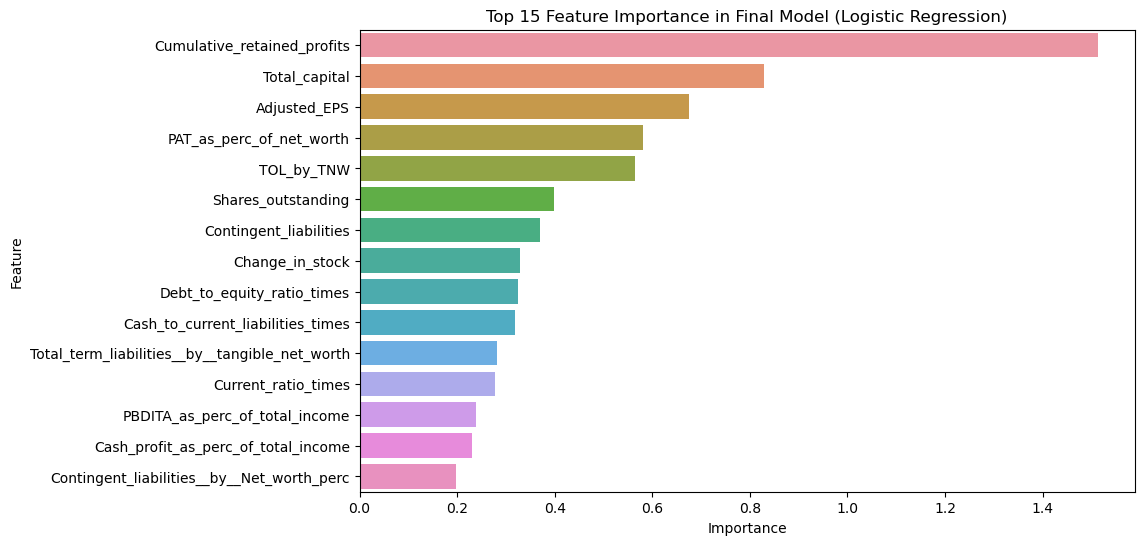

In [82]:
# Calculate Feature Importance using coefficients for Logistic Regression
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(final_model.coef_[0])  # Absolute value of coefficients
}).sort_values(by='Importance', ascending=False)

# Print top features
top_n = 15
top_features = feature_importance.head(top_n)

# Display feature importance
print("Top 15 Features in Final Model:\n", top_features)

# Visualize Top Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title(f'Top {top_n} Feature Importance in Final Model (Logistic Regression)')
plt.show()


### Final Model Comparison Based on Recall:

Here is a summary of the recall scores for the models you have:

### Logistic Regression:
Recall: 0.9184
Logistic Regression has the highest recall, meaning it is very good at identifying positive cases (i.e., identifying the companies that are more likely to default). This makes it a suitable choice when the focus is on minimizing false negatives (i.e., not missing potential defaulters).

#### Logistic Regression (Optimal Threshold):
Recall: 0.9184
The recall remains the same when the threshold is optimized. This shows that even with the adjusted threshold, Logistic Regression continues to perform well in identifying defaulters.

#### Random Forest:
Recall: 0.1224
The Random Forest model has a very low recall, which suggests it is not identifying many positive cases, or it is overly conservative in predicting defaults. This could mean that it's missing a lot of companies that are likely to default.

#### Tuned Random Forest:
Recall: 0.4898
While tuned Random Forest improves the recall compared to the base Random Forest, it still doesn't match Logistic Regression’s performance. However, it shows improvement, indicating that with further tuning, it could perform better in detecting defaulters.

#### Conclusion:
Logistic Regression was selected as the final model based on its highest recall score of 0.9184. This makes it the best choice for the task, especially if the goal is to minimize the risk of missing companies that are likely to default. The high recall indicates that the model is highly sensitive in predicting positive outcomes (defaults).

#### Even though the Random Forest models (both base and tuned) show some promise, they still fail to match the recall performance of Logistic Regression, making it the most reliable model for this task.


# Part B

## Context
### Investors face market risk, arising from asset price fluctuations due to economic events, geopolitical developments, and investor sentiment changes. Understanding and analyzing this risk is crucial for informed decision-making and optimizing investment strategies.

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [87]:
stock_prices = pd.read_csv('Market_Risk_Data_coded.csv')

In [88]:
stock_prices.head()

Date  ITC Limited  Bharti Airtel  Tata Motors  DLF Limited  Yes Bank
0  28-03-2016          217            316          386          114       173
1  04-04-2016          218            302          386          121       171
2  11-04-2016          215            308          374          120       171
3  18-04-2016          223            320          408          122       172
4  25-04-2016          214            319          418          122       175

In [89]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('.', '')

In [90]:
stock_prices.head()

Date  ITC_Limited  Bharti_Airtel  Tata_Motors  DLF_Limited  Yes_Bank
0  28-03-2016          217            316          386          114       173
1  04-04-2016          218            302          386          121       171
2  11-04-2016          215            308          374          120       171
3  18-04-2016          223            320          408          122       172
4  25-04-2016          214            319          418          122       175

In [91]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 418 
The number of columns (variables) is 6


In [92]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           418 non-null    object
 1   ITC_Limited    418 non-null    int64 
 2   Bharti_Airtel  418 non-null    int64 
 3   Tata_Motors    418 non-null    int64 
 4   DLF_Limited    418 non-null    int64 
 5   Yes_Bank       418 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.7+ KB


In [93]:
stock_prices.describe()

ITC_Limited  Bharti_Airtel  Tata_Motors  DLF_Limited    Yes_Bank
count   418.000000     418.000000   418.000000   418.000000  418.000000
mean    278.964115     528.260766   368.617225   276.827751  124.442584
std      75.114405     226.507879   182.024419   156.280781  130.090884
min     156.000000     261.000000    65.000000   110.000000   11.000000
25%     224.250000     334.000000   186.000000   166.250000   16.000000
50%     265.500000     478.000000   399.500000   213.000000   30.000000
75%     304.000000     706.750000   466.000000   360.500000  249.750000
max     493.000000    1236.000000  1035.000000   928.000000  397.000000

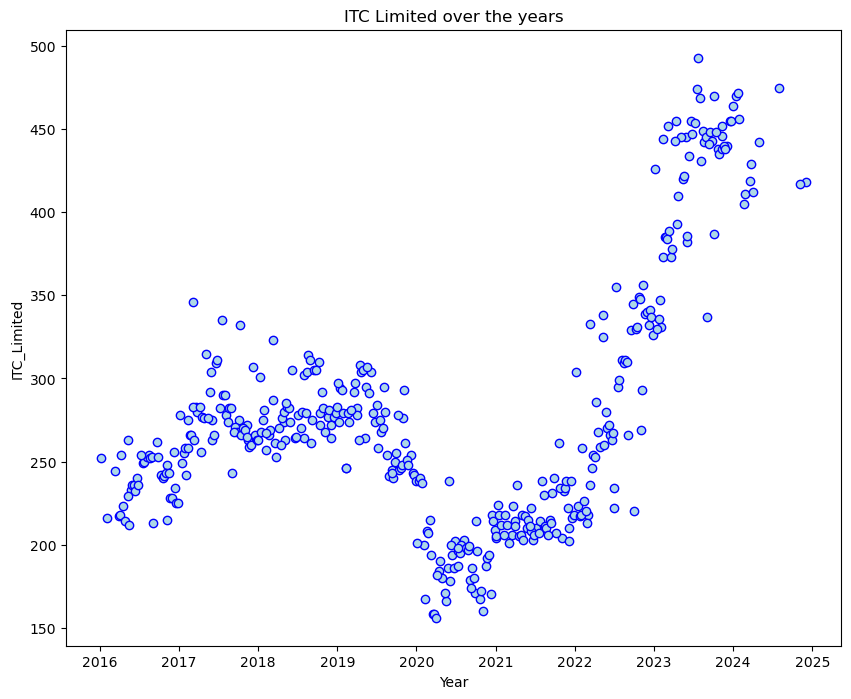

In [94]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['ITC_Limited'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('ITC_Limited')
plt.title('ITC Limited over the years')
plt.show()

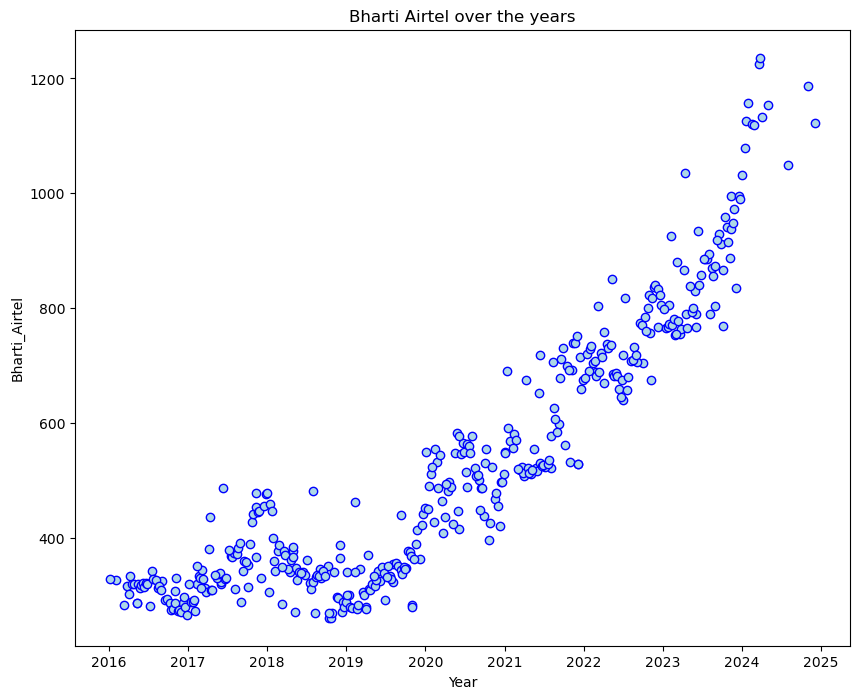

In [95]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Bharti_Airtel'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Bharti_Airtel')
plt.title('Bharti Airtel over the years')
plt.show()


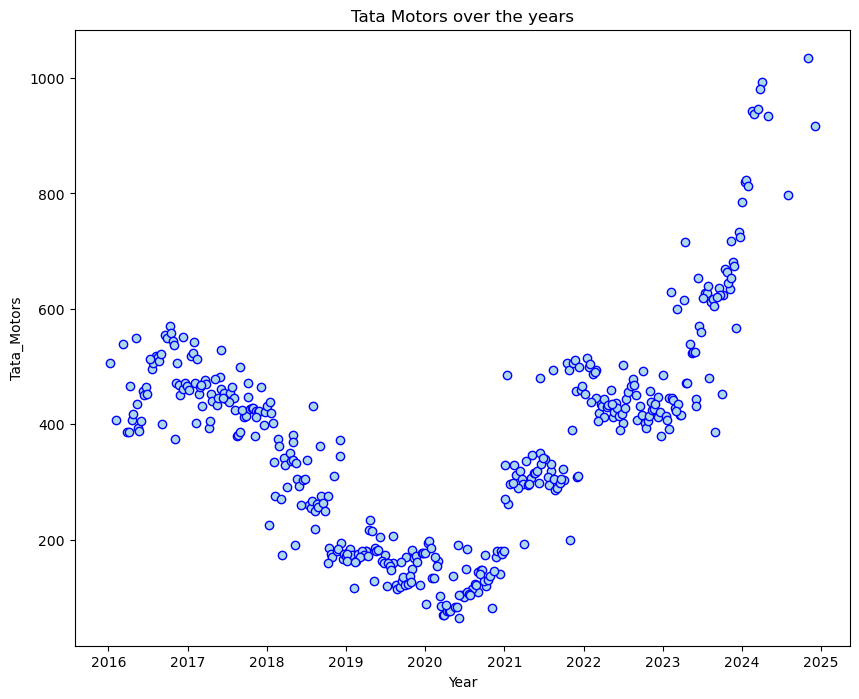

In [96]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Tata_Motors'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Tata_Motors')
plt.title('Tata Motors over the years')
plt.show()


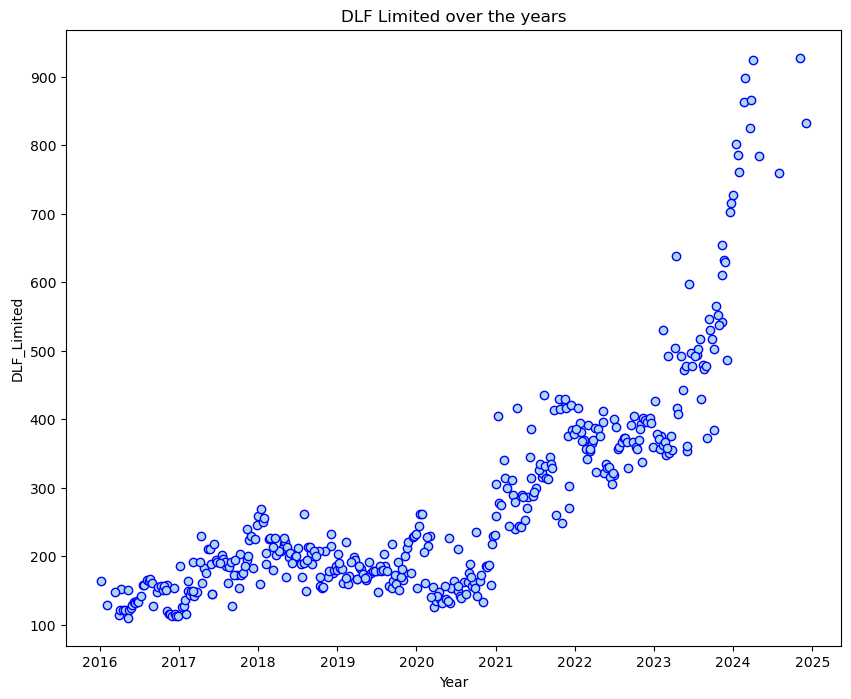

In [97]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['DLF_Limited'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('DLF_Limited')
plt.title('DLF Limited over the years')
plt.show()


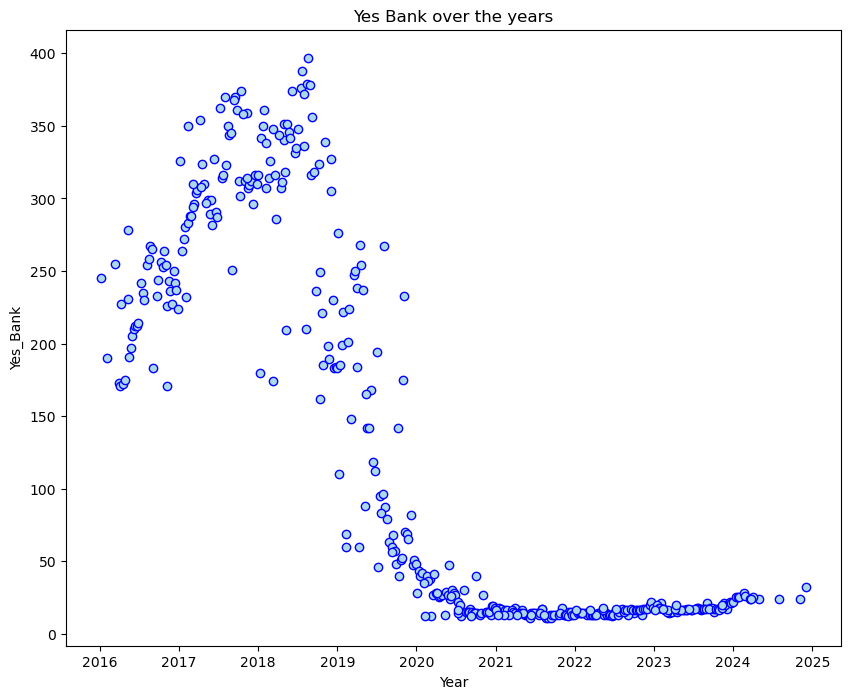

In [98]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Yes_Bank'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Yes_Bank')
plt.title('Yes Bank over the years')
plt.show()


## Analyzing returns

Steps for calculating returns from prices:
- Take logarithms
- Take differences

In [101]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [102]:
stock_returns.shape

(418, 5)

In [103]:
stock_returns.head()

ITC_Limited  Bharti_Airtel  Tata_Motors  DLF_Limited  Yes_Bank
0          NaN            NaN          NaN          NaN       NaN
1     0.004598      -0.045315     0.000000     0.059592 -0.011628
2    -0.013857       0.019673    -0.031582    -0.008299  0.000000
3     0.036534       0.038221     0.087011     0.016529  0.005831
4    -0.041196      -0.003130     0.024214     0.000000  0.017291

### We now look at Means & Standard Deviations of these returns

- Stock Means: Average returns that the stock is making on a week to week basis
- Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

### Calculating stock means

In [106]:
stock_means = stock_returns.mean(axis = 0)
stock_means

ITC_Limited      0.001634
Bharti_Airtel    0.003271
Tata_Motors      0.002234
DLF_Limited      0.004863
Yes_Bank        -0.004737
dtype: float64

#### Calculating stock standard deviation

In [108]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

ITC_Limited      0.035904
Bharti_Airtel    0.038728
Tata_Motors      0.060484
DLF_Limited      0.057785
Yes_Bank         0.093879
dtype: float64

In [109]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

Average  Volatility
ITC_Limited    0.001634    0.035904
Bharti_Airtel  0.003271    0.038728
Tata_Motors    0.002234    0.060484
DLF_Limited    0.004863    0.057785
Yes_Bank      -0.004737    0.093879

### Plot of Mean vs Standard Deviation for all stock returns


### Add labels for each stock

 ## Plot of Mean vs Standard Deviation for all stock returns

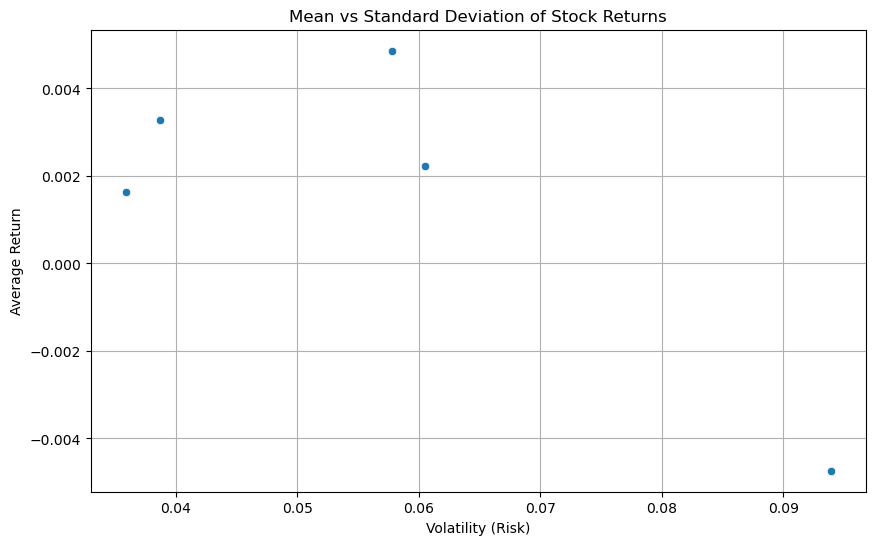

In [113]:
plt.figure(figsize=(10, 6))

# Seaborn scatter plot for Mean vs Standard Deviation
plot = sns.scatterplot(x=df['Volatility'], y=df['Average'])
# Adding labels and title for clarity
plt.title("Mean vs Standard Deviation of Stock Returns")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Average Return")
plt.grid(True)

# Display the plot
plt.show()

# END